In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DIR_PATH = 'C:/programmering/DTU/robobot/data/aruco'
CM_PATH = 'C:/programmering/DTU/robobot/config/camera/calibration_matrix.npy'
DIST_PATH = 'C:/programmering/DTU/robobot/config/camera/distortion_coefficients.npy'

In [3]:
mtx = np.load(CM_PATH)
dist = np.load(DIST_PATH)

In [4]:
marker_size = 0.050

marker_points = np.array([[-marker_size / 2, marker_size / 2, 0],
                            [marker_size / 2, marker_size / 2, 0],
                            [marker_size / 2, -marker_size / 2, 0],
                            [-marker_size / 2, -marker_size / 2, 0]], dtype=np.float32)

In [5]:
files = os.listdir(DIR_PATH)


images = [cv2.imread(f"{DIR_PATH}/image_{i}.jpg") for i in range(1, len(files)+1)]
# images = [cv2.imread(os.path.join(DIR_PATH, f)) for f in files]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

In [6]:
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_100)
parameters = cv2.aruco.DetectorParameters()

# Create the ArUco detector
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)

[-0.25352892 -0.03766877 -0.10146617]
[ 0.10683144 -0.03725761 -0.25137651]


<Figure size 1000x1000 with 0 Axes>

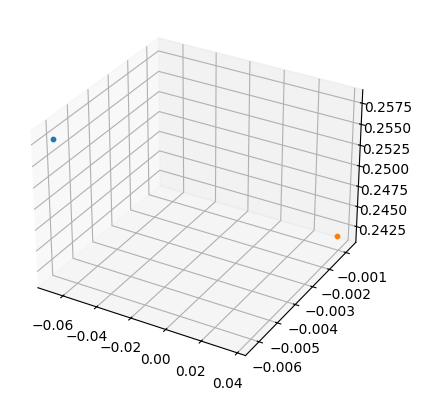

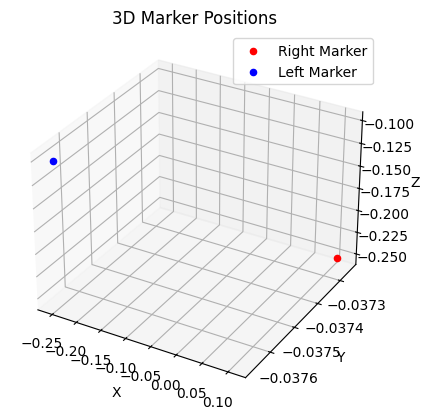

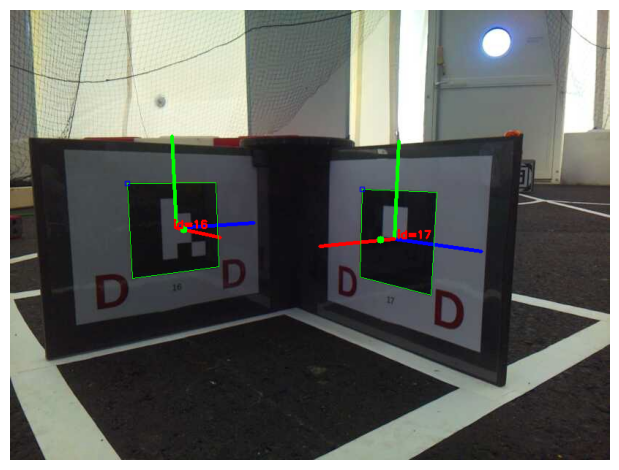

In [94]:
from mpl_toolkits.mplot3d import Axes3D


plt.figure(figsize=(10, 10))
# Detect the markers

img = images[0].copy()

corners, ids, rejected = detector.detectMarkers(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

rvecs_list, tvecs_list = [], []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for _id, _corners in zip(ids, corners):
    # Get the rotation and translation vectors
    ret, rvecs, tvecs = cv2.solvePnP(marker_points, _corners, mtx, dist)
    
    
    
    # Draw the coordinate axes
    img = cv2.drawFrameAxes(img, mtx, dist, rvecs, tvecs, marker_size)
    
    offset = 0.01
    
    offset_vector = np.dot(cv2.Rodrigues(rvecs)[0], np.array([0, 0, offset]))
    # Calculate the position of the marker in 3D space
    position = tvecs.flatten() + offset_vector
    
    rvecs_list.append(rvecs)
    tvecs_list.append(tvecs)
    
    # Plot the marker position
    ax.scatter(position[0], position[1], position[2], label=f"ID: {_id[0]}", s=10)
    

    projected_point, _ = cv2.projectPoints(position.reshape(-1, 3), np.zeros((3,1)), np.zeros((3,1)), mtx, dist)
    center = tuple(projected_point.ravel().astype(int))
    img = cv2.circle(img, center, radius=5, color=(0, 255, 0), thickness=-1)
    
if 16 in ids and 17 in ids:
    left_idx = np.where(ids == 16)[0][0]
    right_idx = np.where(ids == 17)[0][0]
    
    left_tvec = tvecs_list[left_idx].flatten()
    right_tvec = tvecs_list[right_idx].flatten()
    left_tvec[1] = 0
    right_tvec[1] = 0
     
    left_rvec = rvecs_list[left_idx].flatten()
    right_rvec = rvecs_list[right_idx].flatten()
    
    left_rmtx = cv2.Rodrigues(left_rvec)[0]
    right_rmtx = cv2.Rodrigues(right_rvec)[0]
    
    # Convert right_tvec to the left marker's coordinate system
    right_tvec_in_left = np.dot(left_rmtx.T, left_tvec.flatten())

    # Convert left_tvec to the right marker's coordinate system
    left_tvec_in_left = np.dot(right_rmtx.T, left_tvec.flatten())
    
    #New point
    print(left_tvec_in_left)
    print(right_tvec_in_left)
    new_point = np.array([right_tvec_in_left[0], 0, left_tvec_in_left[2]])
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(right_tvec_in_left[0], right_tvec_in_left[1], right_tvec_in_left[2], label='Right Marker', color='red')
    ax.scatter(left_tvec_in_left[0], left_tvec_in_left[1], left_tvec_in_left[2], label='Left Marker', color='blue')
    
    # ax.scatter(new_point[0], new_point[1], new_point[2], label='New Point', color='purple')
    # ax.scatter(left_tvec_in_left[0], left_tvec_in_left[1], left_tvec_in_left[2], label='Left Marker in Right', color='green')
    # ax.scatter(right_tvec_in_left[0], right_tvec_in_left[1], right_tvec_in_left[2], label='Right Marker in Left', color='orange')
    ax.set_title('3D Marker Positions')
    ax.legend()
    # ax.view_init(elev=0, azim=-90)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    
    
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# Set up the bird's-eye view
ax.view_init(elev=0, azim=-90)
ax.legend()
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)
plt.show()



# Draw the markers
img = cv2.aruco.drawDetectedMarkers(img, corners, ids)
plt.imshow(img)
plt.axis('off')
# plt.title(f"Image {i+1}, ID: {ids}")
plt.tight_layout()
# plt.show()
plt.show()


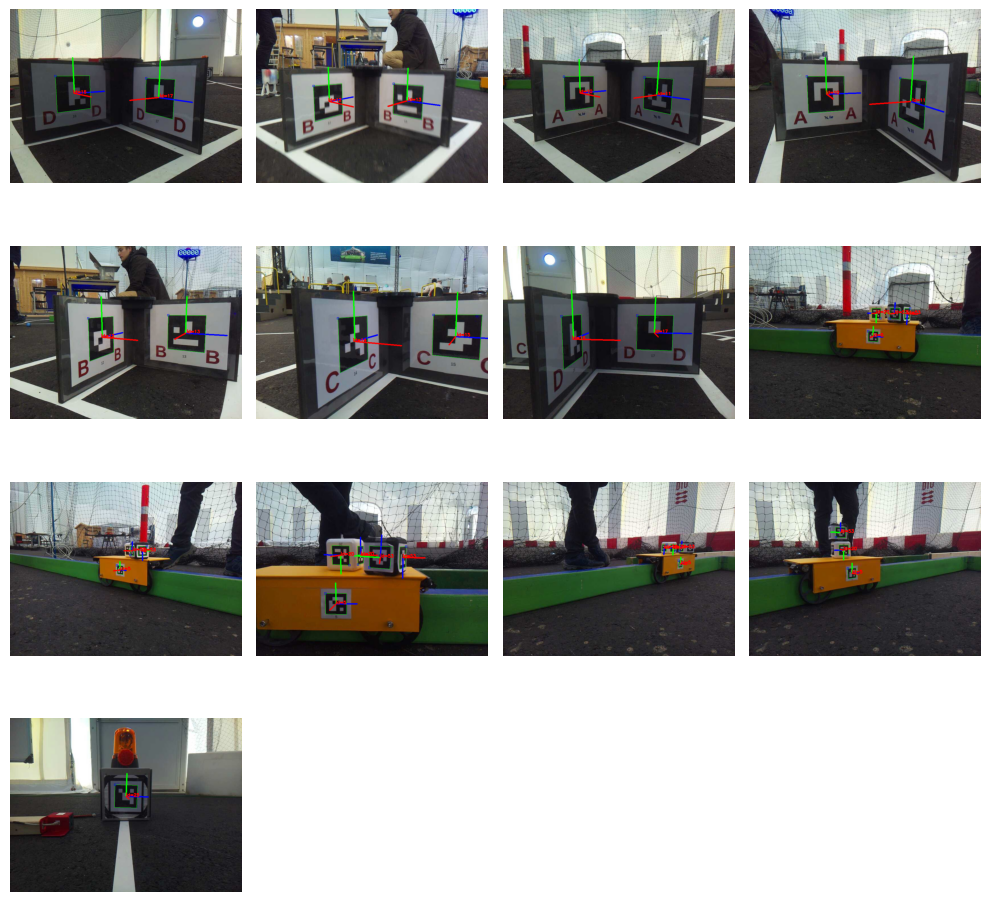

In [8]:


# Create the ArUco detector
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
plt.figure(figsize=(10, 10))

for i, img in enumerate(images):
    
    img = img.copy()
    
    # Detect the markers
    corners, ids, rejected = detector.detectMarkers(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    
    for _id, _corners in zip(ids, corners):
        # Get the rotation and translation vectors
        ret,rvecs, tvecs = cv2.solvePnP(marker_points, _corners, mtx, dist) 
        
        # Draw the coordinate axes
        img = cv2.drawFrameAxes(img, mtx, dist, rvecs, tvecs, marker_size)
    
    # Draw the markers
    img = cv2.aruco.drawDetectedMarkers(img, corners, ids)
    plt.subplot(4, 4, i+1)
    plt.imshow(img)
    plt.axis('off')
    # plt.title(f"Image {i+1}, ID: {ids}")
    plt.tight_layout()
    # plt.show()
plt.show()


In [9]:
tvecs


array([[ 0.00114842],
       [-0.02450405],
       [ 0.4035346 ]])

In [10]:
img.shape

(616, 820, 3)